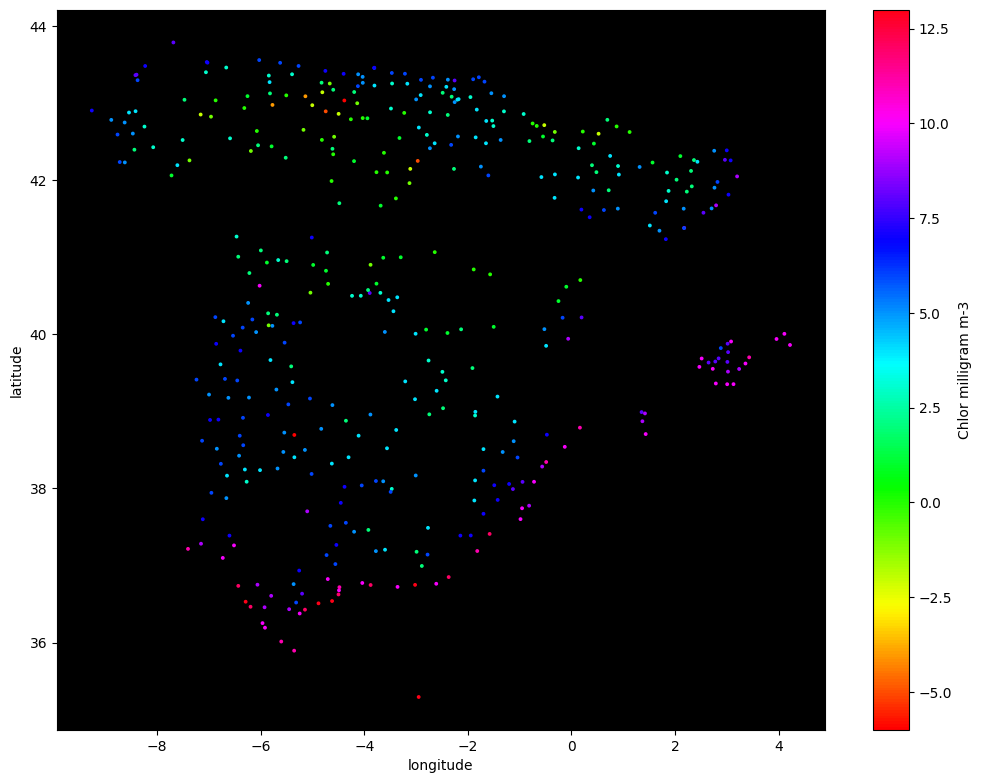

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import NearestNDInterpolator


df = pd.read_csv('./prueba.csv')
df = df.iloc[1:,[-1,-2,5]]
df = df.query('latitude > 30 and latitude < 44')
a = []
for _ in df.iloc[:, 2].values:
    a.append(round(float(_)))

plt.subplot(111)
plt.scatter(df['longitude'], df['latitude'], s=3, marker='o', c=a, cmap=plt.cm.hsv)
plt.xlabel('longitude')
plt.ylabel('latitude')
cbar=plt.colorbar()
cbar.set_label('Chlor milligram m-3')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.show()

/tmp/ipykernel_7125/416719370.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop(['Unnamed: 4'], 1)


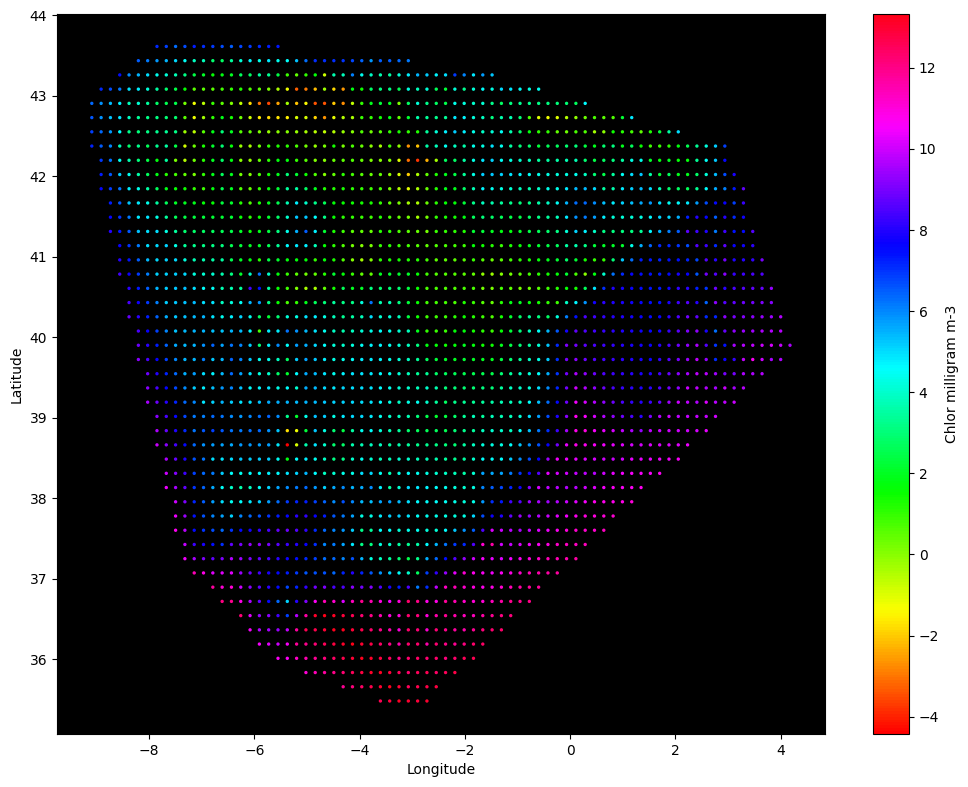

In [10]:
miny, maxy = min(df['longitude']), max(df['latitude'])
minx, maxx = min(df['longitude']), max(df['latitude'])
grdi_x = np.linspace(minx, maxx, num=300, endpoint=False)
grdi_y = np.linspace(miny, maxy, num=300, endpoint=False)
yg, xg = np.meshgrid(grdi_y, grdi_x, indexing='ij')
x_g = xg.ravel()
y_g = yg.ravel()




df2 = df.drop(['Unnamed: 4'], 1)
df3 = df['Unnamed: 4']
points = np.array(df2)
values = np.array(df3)
interpolador = NearestNDInterpolator(points, values)
est_u = interpolador(x_g, y_g)

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (x_g, y_g), method='linear')
plt.subplot(111)
plt.scatter(x_g, y_g, s=2, marker='o', c=grid_z0, cmap=plt.cm.hsv)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
cbar=plt.colorbar()
cbar.set_label('Chlor milligram m-3')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.show()

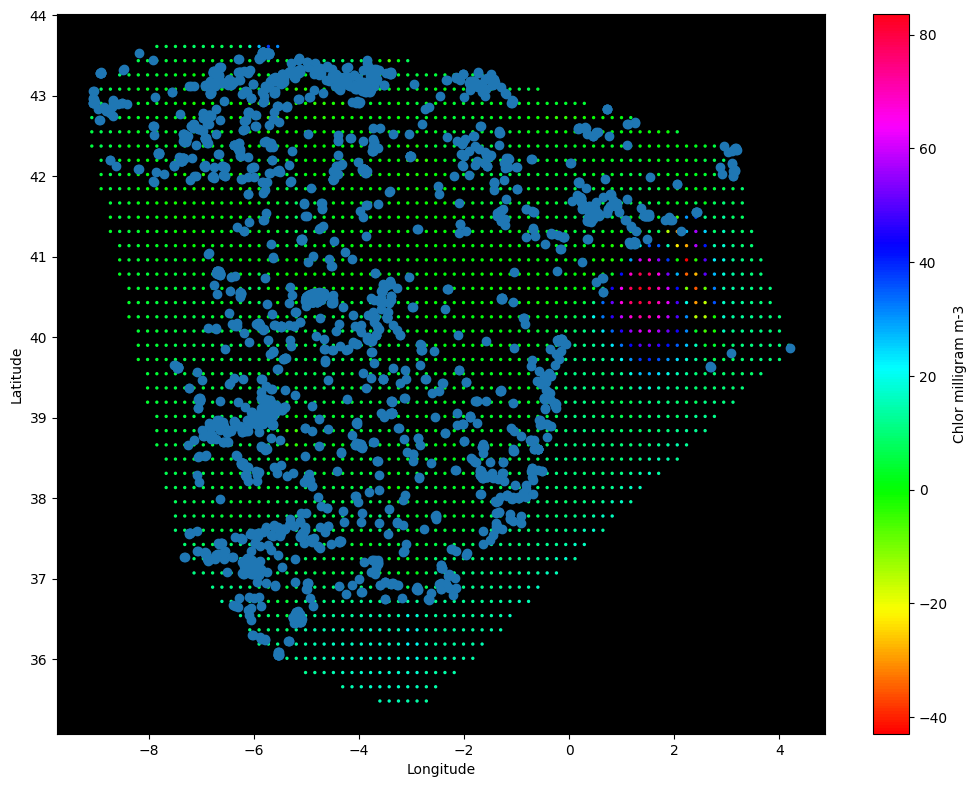

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,37.0886,-5.8802,300.4,1.1,1.0,2021-01-02,1125,Terra,MODIS,37,6.03,287.8,5.1,D,0
1,36.6599,-4.8777,305.5,1.8,1.3,2021-01-02,1304,Aqua,MODIS,62,6.03,282.8,21.3,D,0
2,36.8729,-2.4486,304.8,1.2,1.1,2021-01-02,2228,Terra,MODIS,62,6.03,277.7,13.9,N,0
3,36.8745,-2.4347,334.7,1.2,1.1,2021-01-02,2228,Terra,MODIS,100,6.03,279.1,53.3,N,2
4,40.2352,-0.8699,320.1,1.1,1.1,2021-01-04,1112,Terra,MODIS,80,6.03,276.0,26.4,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719,43.2687,-5.2530,307.4,1.1,1.0,2021-12-31,2206,Terra,MODIS,71,6.03,281.5,10.3,N,0
4720,43.1755,-5.4329,309.2,1.1,1.0,2021-12-31,2206,Terra,MODIS,77,6.03,279.5,12.8,N,0
4721,43.2442,-3.7813,316.1,1.0,1.0,2021-12-31,2206,Terra,MODIS,93,6.03,286.3,15.5,N,0
4722,43.1631,-5.5095,303.0,1.1,1.0,2021-12-31,2206,Terra,MODIS,47,6.03,273.1,8.8,N,0


In [11]:
aa = pd.read_csv("./modis_2021_Spain_incendios.csv")
aa = aa.query('latitude > 30')
y = aa["latitude"]
x = aa["longitude"]
grid_z0 = griddata(points, values, (x_g, y_g), method='cubic')
plt.subplot(111)
plt.scatter(x_g, y_g, s=2, marker='o', c=grid_z0, cmap=plt.cm.hsv)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
cbar=plt.colorbar()
cbar.set_label('Chlor milligram m-3')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.scatter(x, y)
plt.show()
aa

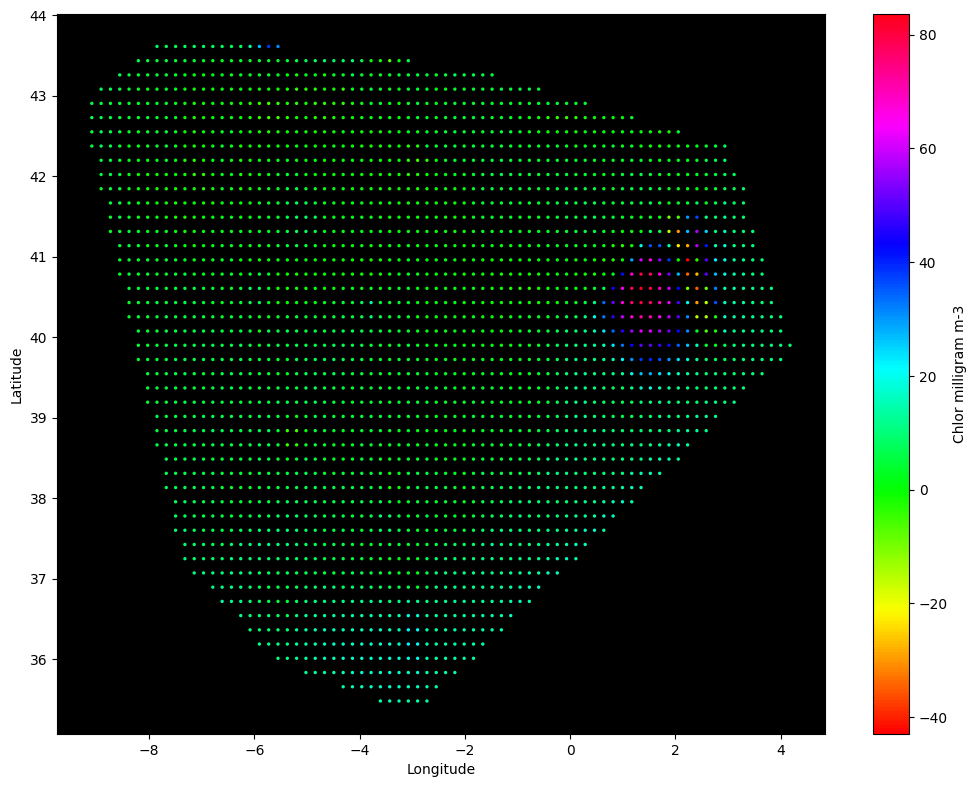

In [12]:
grid_z0 = griddata(points, values, (x_g, y_g), method='cubic')
plt.subplot(111)
plt.scatter(x_g, y_g, s=2, marker='o', c=grid_z0, cmap=plt.cm.hsv)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
cbar=plt.colorbar()
cbar.set_label('Chlor milligram m-3')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.5, wspace=0.2, hspace=0.2)
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.show()

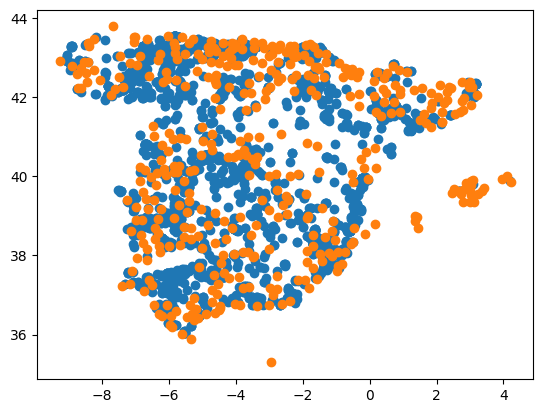

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
ee = pd.read_csv("./modis_2021_Spain_incendios.csv")
ee = ee.query('latitude > 30')
y2 = ee["latitude"]
x2 = ee["longitude"]
plt.scatter(x2, y2)

asdasdasd = pd.read_csv('./prueba.csv')
asdasdasd = asdasdasd.iloc[1:,[-1,-2,4]]
asdasdasd = asdasdasd.query('latitude > 30 and latitude < 44')
y = asdasdasd["latitude"]
x = asdasdasd["longitude"]
plt.scatter(x, y)
plt.show()

In [103]:

asdasdasd = pd.read_csv('./prueba.csv')
asdasdasd

,Unnamed: 0,España,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,latitude,longitude
0,3,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),0.000000,0.000000
1,4,Estaca de Bares,A Coruña,10.0 (08:20),6.4 (12:40),8.2,68 (12:40),53 (02:00),5.8,1,1.6,3.2,0,43.786111,-7.684722
2,7,A Coruña,A Coruña,9.8 (12:20),6.0 (08:00),7.9,61 (14:20),33 (14:20),12,6.8,0.6,1.6,3,43.365833,-8.421389
3,10,Cabo Vilan,A Coruña,9.9 (13:30),5.3 (04:30),7.6,82 (15:30),60 (15:30),5.1,1.5,1.2,0.7,1.7,43.160556,-9.210833
4,12,Fisterra,A Coruña,8.7 (10:50),5.0 (23:50),6.8,90 (15:50),52 (15:50),2.8,1,0.2,0.8,0.8,42.924722,-9.291389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,775,Calatayud,Zaragoza,6.8 (13:50),0.2 (23:30),3.5,46 (15:30),29 (15:30),5,3.2,0.2,0,1.6,41.331111,-1.645278
187,777,Zaragoza Aeropuerto,Zaragoza,9.3 (16:20),3.1 (23:10),6.2,46 (13:30),35 (13:30),1.2,0,0,0,1.2,41.660556,-1.004167
188,778,"Zaragoza, Valdespartera",Zaragoza,9.3 (15:50),3.5 (22:40),6.4,52 (12:30),30 (12:30),2.6,0,0,0,2.6,41.620833,-0.935000
189,792,Trujillo,Cáceres,8.6 (16:30),0.7 (09:00),4.7,32 (08:00),19 (08:00),0.1,0,0.1,0,0,39.482500,-5.854167
